OCNG - 689 - Python For Geosciences Spring 2023

### Are large swell events in Central California becoming more regular?

### A View of Temporal Variablility of Swell in Monterey, CA

In [1]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import cartopy
import cartopy.crs as ccrs 
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from shapely.geometry import Point, LineString
import geopandas as gpd
from matplotlib.ticker import AutoMinorLocator

### 1. Introduction

While most people understand that climate change means average global temperature is increasing, most do not understand that this translates to more extreme weather events and climate extremes. Droughts and floods, etc. The current and most hazardous to coastal communities in California is sea-level rise combined with powerful winter swells from the North Pacific. This past January Santa Cruz, CA lost 2 out of 3 of their piers due to a significant West swell with a signature of 22 feet at 18 seconds. 

How often do swells like this come?
Could the frequency of the large swells be increasing? 


![code](12666578_before-after-sc.jpeg)

### 2. Method and Dataset Used

To examine this I sampled a large data network from National Data Buoy Center Website and used Station 46042. This station is 27 Nautical Miles NW of Monterey, CA just offshore from the Monterey Bay. 

I then leveraged Pandas dataframes and Matplotlib to analyze the temporal variability in significant wave height (or wave height), mean wave direction, and wind direction from Jan 1, 2000 to Dec 31, 2023. Afterwards, I calculated the frequency of large swell events through time, and assessed all the results. 


### Buoy Location

Text(0.5, 1.0, 'Location of Buoy 46042 - Monterey Bay, CA\n')

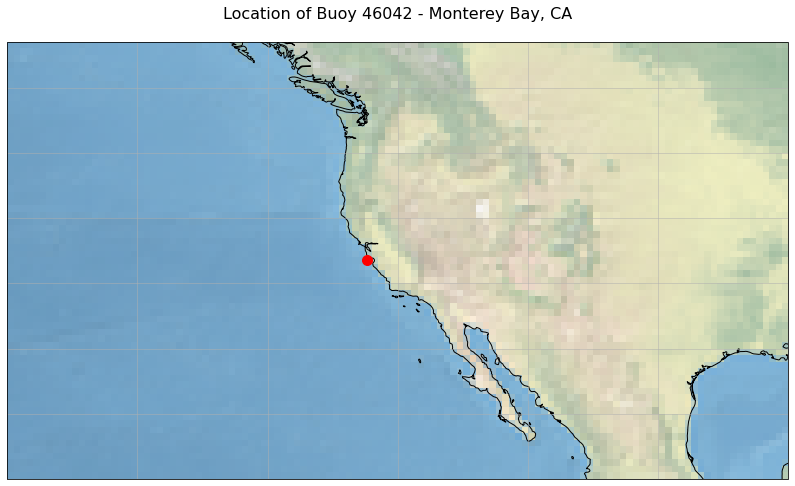

In [2]:
lat, lon = 36.785, -122.396
fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m', linewidth=1)
ax.gridlines(linewidth=1,alpha=.5)
ax.stock_img()
ax.plot(lon, lat, marker='o', color='red', markersize=10, transform=ccrs.PlateCarree())
ax.set_extent([-150,-90,20,50])
ax.set_title('Location of Buoy 46042 - Monterey Bay, CA\n',fontsize=16)

### 3. Data Analysis

In [3]:
#### Read data from NDBC through for loop for 2000 to 2004
url_template = 'https://www.ndbc.noaa.gov/view_text_file.php?filename=46042h{year}.txt.gz&dir=data/historical/stdmet/'
dfs = []
for year in range(2000, 2005):
    url = url_template.format(year=year)
    df = pd.read_csv(url, delim_whitespace=True, skiprows=1, header=None, names=['year', 'month', 'day', 'hour', 'wdir', 'wspd', 'gst', 'wvht', 'dpd', 'apd', 'mwd', 'pres', 'atmp', 'wtmp', 'dewp', 'vis', 'ptdy', 'tide'])
    dfs.append(df)
    
df = pd.concat(dfs, ignore_index=True)
df.head()

,year,month,day,hour,wdir,wspd,gst,wvht,dpd,apd,mwd,pres,atmp,wtmp,dewp,vis,ptdy,tide
0,2000,1,1,0,297,4.9,6.1,1.22,7.14,5.68,323,1017.4,11.0,11.6,6.5,99.0,NaN,NaN
1,2000,1,1,1,305,5.2,6.4,1.33,6.67,5.60,320,1017.6,11.1,11.7,6.7,99.0,NaN,NaN
2,2000,1,1,2,302,5.5,6.7,1.29,7.14,5.41,324,1018.1,11.2,11.6,6.7,99.0,NaN,NaN
3,2000,1,1,3,304,2.4,3.1,1.22,7.14,5.70,320,1018.1,11.3,11.6,6.6,99.0,NaN,NaN
4,2000,1,1,4,292,4.7,6.1,1.27,6.67,5.90,321,1018.5,11.5,11.6,7.2,99.0,NaN,NaN


In [4]:
#### Read data from NDBC through for loop for 2005 to 2022
dfs2 = []
for year in range(2005, 2023):
    url = url_template.format(year=year)
    df2 = pd.read_csv(url, delim_whitespace=True, skiprows=1, header=None, names=['year', 'month', 'day', 'hour', 'minute', 'wdir', 'wspd', 'gst', 'wvht', 'dpd', 'apd', 'mwd', 'pres', 'atmp', 'wtmp', 'dewp', 'vis', 'ptdy', 'tide'])
    dfs2.append(df2)
    
df2 = pd.concat(dfs2, ignore_index=True)
df2.head()

/Users/dylan/opt/anaconda3/envs/geo2023spring/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,year,month,day,hour,minute,wdir,wspd,gst,wvht,dpd,apd,mwd,pres,atmp,wtmp,dewp,vis,ptdy,tide
0,2005,1,1,0,0,216,7.4,8.6,2.8,12.9,7.83,293,1011.8,12.4,13.8,999.0,99.0,99.0,NaN
1,2005,1,1,1,0,198,8.1,9.3,2.84,12.12,7.74,292,1011.6,12.3,13.8,999.0,99.0,99.0,NaN
2,2005,1,1,2,0,206,8.4,10.1,2.94,12.9,7.62,288,1011.5,12.6,13.8,999.0,99.0,99.0,NaN
3,2005,1,1,3,0,223,8.9,10.5,2.91,12.12,7.29,298,1011.8,11.5,13.8,999.0,99.0,99.0,NaN
4,2005,1,1,4,0,215,8.4,10.9,2.77,12.9,7.16,294,1012.1,12.1,13.8,999.0,99.0,99.0,NaN


/var/folders/4l/gn64yzcd6938cphmlv0bpkj80000gn/T/ipykernel_6940/647630575.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['time'] = pd.to_datetime(data_clean[date_cols])
/Users/dylan/opt/anaconda3/envs/geo2023spring/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/var/folders/4l/gn64yzcd6938cphmlv0bpkj80000gn/T/ipykernel_6940/647630575.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

Text(0, 0.5, 'Year')

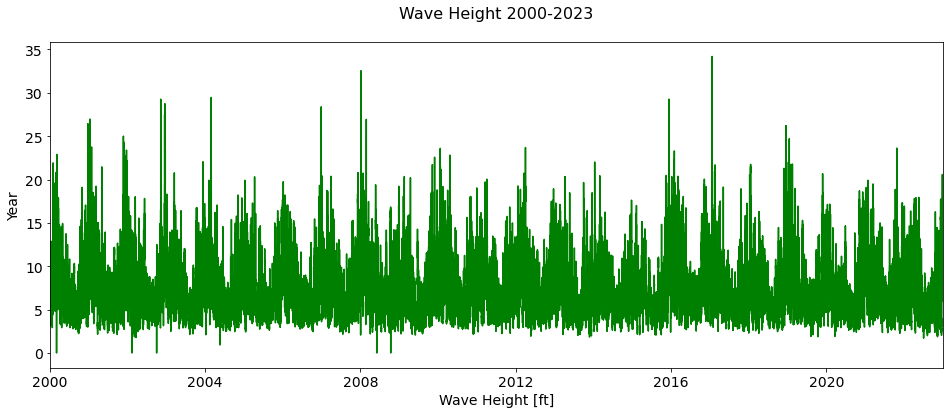

In [5]:
#### concat all
data_list = [df, df2]
data_list = pd.concat(data_list, ignore_index=True)

# need to get rid of strings 
data_clean = data_list[data_list['wvht'] != 'm']
# data_clean

# to datetime index 
date_cols = ['year','month','day','hour']
data_clean['time'] = pd.to_datetime(data_clean[date_cols])
data_clean.set_index('time',inplace=True)
data_clean.drop(date_cols,axis=1,inplace=True)
cols_to_drop = ['pres','atmp','dewp','vis','ptdy','tide','wspd','gst']
# drop extra columns and drop bad sample values (99.0 or 999.0)
data_clean.drop(cols_to_drop,axis=1,inplace=True)
data_clean['wvht'] = data_clean['wvht'].astype(float)
# more
data_clean.wdir = data_clean['wdir'].astype(float)
data_clean.mwd = data_clean['mwd'].astype(float)

#remove bad wvht values === 99.0
data_wave = data_clean.loc[data_clean["wvht"] < 98]
data = data_clean.loc[(data_clean["wdir"] < 999.0) & (data_clean["wvht"] < 98) ]
#### Convert wvht: m to ft
data_wave_ft = data_wave.wvht * 3.28084


#### plot of Wave Height 2000-2023
fig, ax = plt.subplots(1,1,figsize=(16,6))
ax.plot(data_wave.wvht * 3.28084, color='green')
ax.set_title('Wave Height 2000-2023\n',fontsize=16)
ax.set_xlim(data_wave.index[0],data_wave.index[-1])
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('Wave Height [ft]',fontsize=14)
ax.set_ylabel('Year',fontsize=14)
#### shows all wave height measurements in Monterey Bay, California

Text(0.5, 0, 'Month')

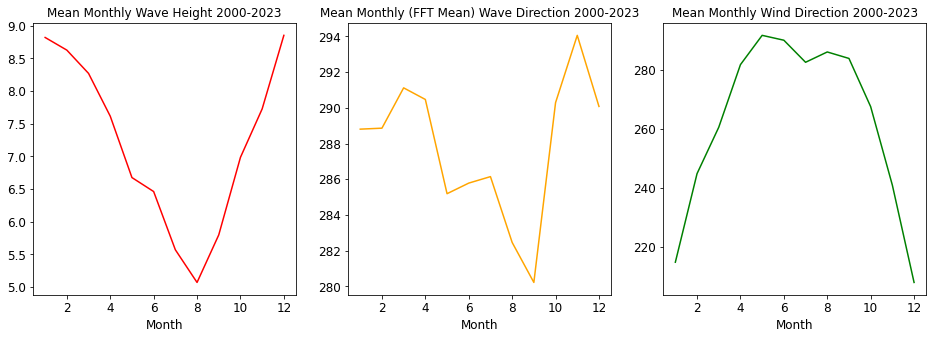

In [6]:
#### Gather Averages etc.
avg_by_year = data.groupby(data.index.year).mean()
avg_by_year_wvht = data_wave_ft.groupby(data_wave_ft.index.year).mean()

# fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
# # axs[0].plot(avg_by_year.wvht)
# axs[0].plot(avg_by_year_wvht)
# axs[1].plot(avg_by_year.wdir)
# axs[2].plot(avg_by_year.mwd)

avg_by_month = data.groupby(data.index.month).mean()
avg_by_month_wvht = data_wave_ft.groupby(data_wave_ft.index.month).mean()
#### by month
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))
axs[0].plot(avg_by_month_wvht,color='r')
axs[0].set_title('Mean Monthly Wave Height 2000-2023',fontsize=12)
axs[0].set_xlabel('Month',fontsize=12)
axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[2].plot(avg_by_month.wdir, color='green')
axs[2].set_title('Mean Monthly Wind Direction 2000-2023',fontsize=12)
axs[2].tick_params(axis='both', which='major', labelsize=12)
axs[2].set_xlabel('Month',fontsize=12)
axs[1].plot(avg_by_month.mwd,color='orange')
axs[1].set_title('Mean Monthly (FFT Mean) Wave Direction 2000-2023',fontsize=12)
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].set_xlabel('Month',fontsize=12)

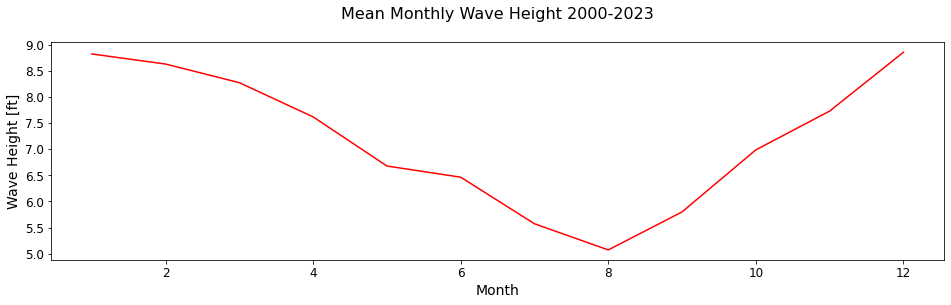

In [7]:
fig, ax = plt.subplots(1,1,figsize=(16,4))
ax.plot(avg_by_month_wvht, color='red',label='Mean Monthly Wave Height')
ax.set_title('Mean Monthly Wave Height 2000-2023\n',fontsize=16)
ax.set_xlabel('Month',fontsize=14)
ax.set_ylabel('Wave Height [ft]', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
#### shows the seasonal variablility in the Monterey Bay

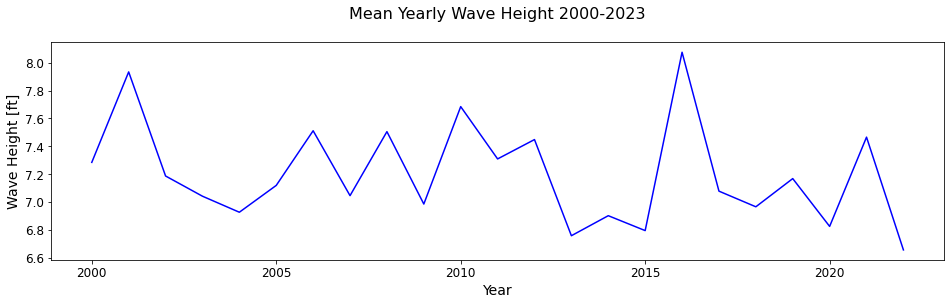

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 4))
ax.plot(avg_by_year_wvht,color='blue')
ax.set_title('Mean Yearly Wave Height 2000-2023\n',fontsize=16)
ax.set_ylabel('Wave Height [ft]',fontsize=14)
ax.set_xlabel('Year',fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
### Doesnt answer the question is frequency of large wave events is changing through time?

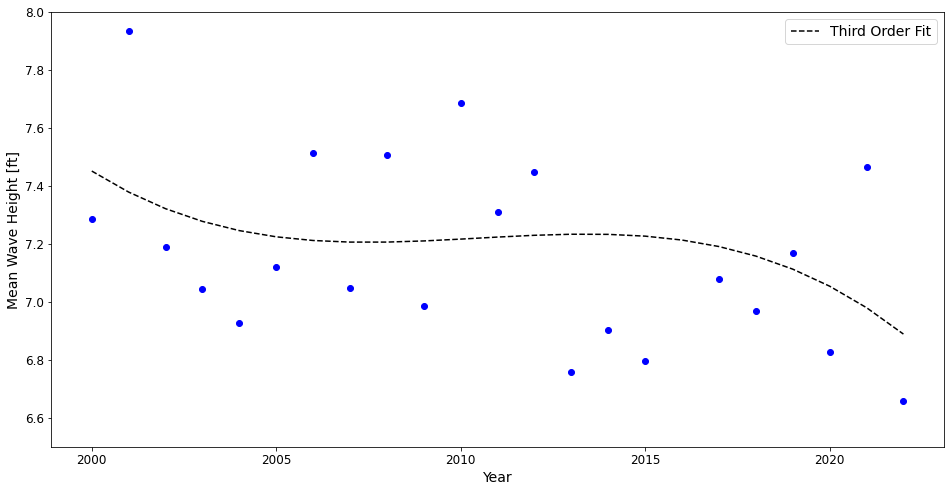

In [9]:
years = np.arange(2000,2023,1)
fig = plt.figure(figsize=(16,8))
plt.scatter(years, avg_by_year_wvht, marker='o',color='blue')
x= years
y= avg_by_year_wvht
poly3 = np.polyfit(x,y,3)
poly3_object = np.poly1d(poly3)
poly3_val = np.polyval(poly3,x)
plt.plot(x,poly3_val, color='black',linestyle='dashed',label='Third Order Fit')
plt.ylabel('Mean Wave Height [ft]',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylim(6.5,8)
plt.legend(loc='upper right',fontsize=14)
#### short-sighted, further account for MJO, ENSO would better predict of course, this polyfit line
# is just helpful for showing general trend

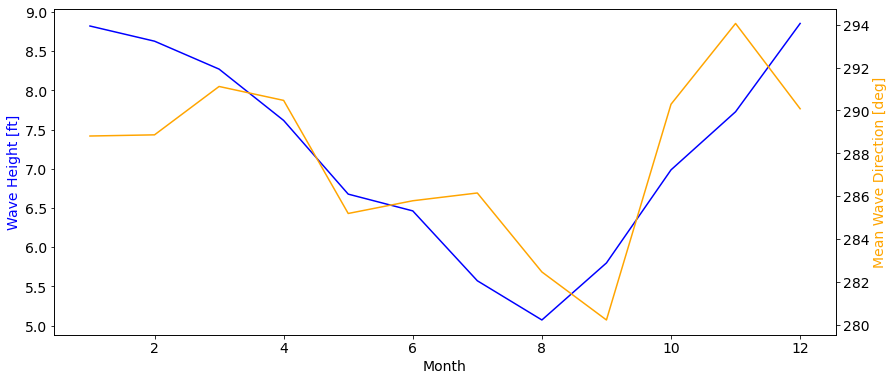

In [10]:
#### Wave direction and Wave Height are roughly correlated by monthly means
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(avg_by_month_wvht, color="blue")
ax2 = ax.twinx()
ax2.plot(avg_by_month.mwd, color="orange")
ax.set_ylabel('Wave Height [ft]', color='blue',fontsize=14)
ax2.set_ylabel('Mean Wave Direction [deg]', color='orange',fontsize=14)
ax.set_xlabel('Month',fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)

Text(0, 0.5, 'Observed Days with Wave Height > 15 ft')

<Figure size 1152x432 with 0 Axes>

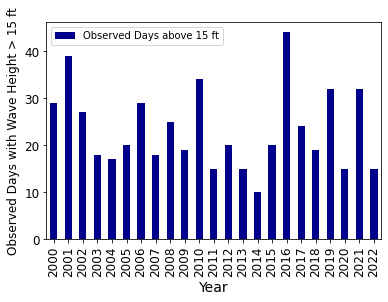

In [11]:
data_wave_resample_daily_max = data_wave['wvht'].resample('1D').max()
data_wave_resample_daily_max_ft = data_wave_resample_daily_max * 3.28084
data_wave_resample_daily_max_ft_clean = data_wave_resample_daily_max_ft.loc[data_wave_resample_daily_max_ft > 15] 
#### convert series back to pd df and it's index is datetime!
new_data = data_wave_resample_daily_max_ft_clean.to_frame()
new_data2 = new_data.copy()
yearly_counts = new_data2.groupby(new_data2.index.year).count()
#### Bar Graph Plot
fig = plt.figure(figsize=(16, 6))
bx = yearly_counts.plot(kind='bar', color='darkblue')
bx.legend(['Observed Days above 15 ft'])
bx.tick_params(axis='both', which='major', labelsize=12)
bx.set_xlabel('Year',fontsize=14)
bx.set_ylabel('Observed Days with Wave Height > 15 ft',fontsize=12)

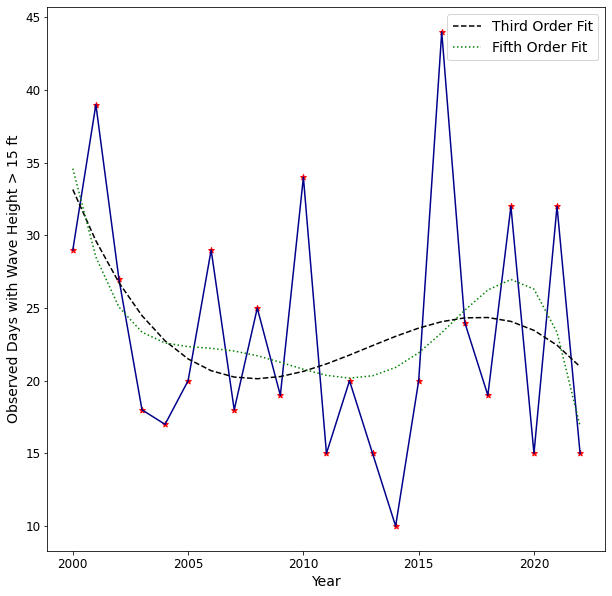

In [12]:
#### Observed Days > 15 ft plot
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.scatter(np.arange(2000,2023,1),yearly_counts,color='red',marker='*')
ax.plot(yearly_counts,color='darkblue')
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_ylabel('Observed Days with Wave Height > 15 ft',fontsize=14)
ax.set_xlabel('Year',fontsize=14)
new_yearly_counts = yearly_counts.astype(float)
x= years
y_new = new_yearly_counts
poly3_new = np.polyfit(x,y_new,3)
poly3_val_new = np.polyval(poly3_new,x)
plt.plot(x,poly3_val_new, color='black',linestyle='dashed',label='Third Order Fit')
poly5 = np.polyfit(x,y_new,5)
poly5_val = np.polyval(poly5,x)
plt.plot(x,poly5_val, color='green',linestyle='dotted',label='Fifth Order Fit')
plt.legend(fontsize=14)

### Conclusion:

1. Seasons greatly affect wave height and wave direction variability.
2. Based off my data, there has generally not been an increase in swell events greater than 15 ft from years 2000 to 2023 for station 46042. Which rejects my hypothesis (which had Observer Bias) and the null hypothesis (no change).
3. The Polyfit lines of 1,3,5 all show trend of a slight decrease trend in quantity of days greater than 15 feet. 
4. Much of the data had to be filtered and there were many dates of which the buoy was offline so that may have affected results as well. 

### If I furthered this work:
Would be interesting to investigate likely correlations of years with large quantities of observations of swell events greater than 15 ft with the phases of ENSO, PDO, MJO. 
